In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
d_train = pd.read_csv('/Users/kaiding/Documents/MIDS/W207 Machine Learning/forest-cover-type-prediction (1)/train.csv')

In [4]:
pd.set_option('display.max_columns', None)
d_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [5]:
# No Missing values
# From column "Wilderness_Area", everything is dummy/indicator variable.
pd.set_option('display.max_columns', None)
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

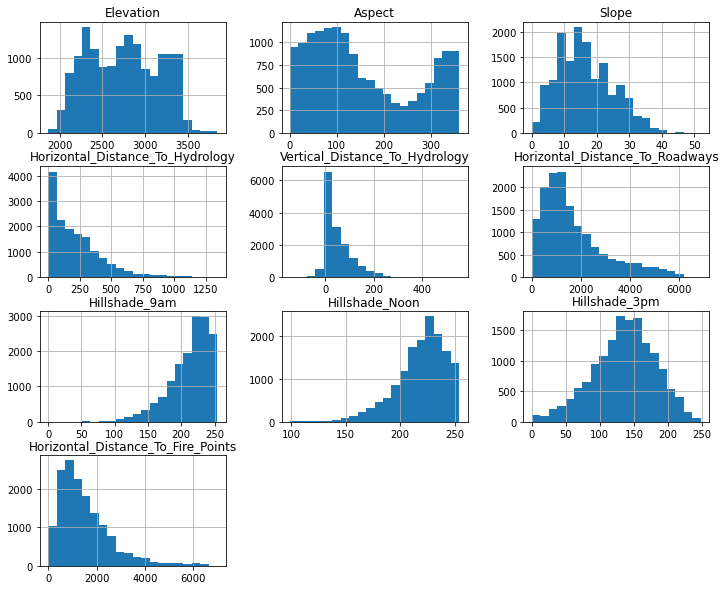

In [6]:
numeric_columns = ['Elevation', 'Aspect', 'Slope',
'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
categorical_columns = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

X_train = d_train.copy()
y_train = X_train.pop("Cover_Type")

#numeric columns distribution
#Forest cover type (1-7 evenly distributed with 2160 each) - No rare types
d_train[numeric_columns].hist(figsize=(12,10),bins=20)
plt.show()

<AxesSubplot:>

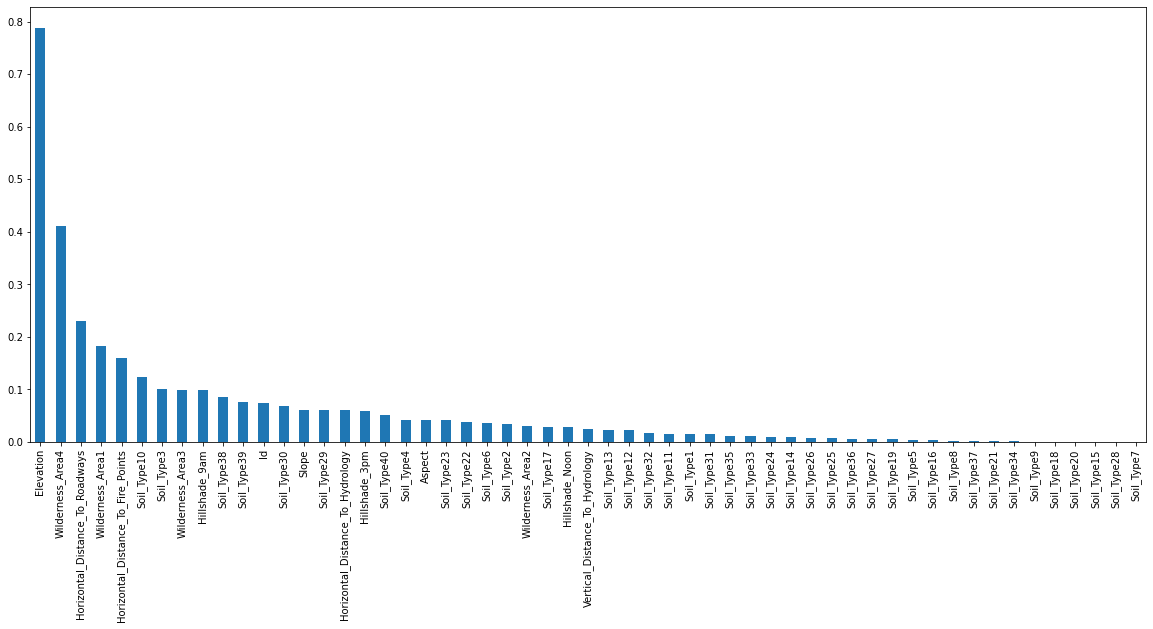

In [7]:
# Explore feature selection
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train,y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [8]:
# 40 soil types data, anyway to simplify?

from sklearn.decomposition import PCA

soil_types = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

pca = PCA()
soil_data = X_train[soil_types]
soil_pca = pca.fit_transform(soil_data)
component_names = [f"PC{i+1}" for i in range(soil_pca.shape[1])]
soil_pca = pd.DataFrame(soil_pca, columns=component_names)

soil_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,-0.264553,0.899214,0.070275,0.036260,0.012763,0.001875,-0.016795,0.015198,0.003838,-0.011217,0.003476,-0.001951,-0.024101,-0.006892,-0.013315,-0.013561,-0.003615,-0.003720,-0.008407,-0.005725,-0.007242,-0.001216,-0.003311,-0.003012,-0.001924,-0.002123,-0.001116,-0.000946,-0.000789,-0.000584,-0.000479,-0.000205,-0.000316,7.183853e-17,-0.000111,-0.000031,1.882197e-17,3.875864e-16,-1.258670e-17,-2.744888e-18
1,-0.264553,0.899214,0.070275,0.036260,0.012763,0.001875,-0.016795,0.015198,0.003838,-0.011217,0.003476,-0.001951,-0.024101,-0.006892,-0.013315,-0.013561,-0.003615,-0.003720,-0.008407,-0.005725,-0.007242,-0.001216,-0.003311,-0.003012,-0.001924,-0.002123,-0.001116,-0.000946,-0.000789,-0.000584,-0.000479,-0.000205,-0.000316,-8.405945e-17,-0.000111,-0.000031,-3.773036e-18,3.290017e-15,1.363087e-16,1.377329e-17
2,-0.100685,-0.061215,-0.035431,-0.028357,-0.013246,-0.002119,0.020511,-0.020778,-0.005736,0.017995,-0.005943,0.003418,0.069445,0.023782,0.060408,0.085566,0.027780,0.032605,0.220462,0.954233,-0.168847,-0.022674,-0.045213,-0.032326,-0.018617,-0.015872,-0.008037,-0.006547,-0.005160,-0.003623,-0.002899,-0.001235,-0.001868,4.008401e-16,-0.000655,-0.000175,4.119452e-17,1.525929e-14,7.890842e-16,8.739352e-17
3,-0.141793,-0.122407,-0.119708,-0.170903,-0.286749,-0.689904,-0.517576,0.192502,0.034241,-0.082212,0.022151,-0.011865,-0.085034,-0.021955,-0.037957,-0.035341,-0.009063,-0.009132,-0.018777,-0.012315,-0.014754,-0.002449,-0.006530,-0.005819,-0.003679,-0.003937,-0.002059,-0.001737,-0.001436,-0.001054,-0.000861,-0.000368,-0.000566,1.147893e-17,-0.000199,-0.000055,-6.816131e-17,-4.564024e-15,-3.061951e-16,-3.230975e-17
4,-0.264553,0.899214,0.070275,0.036260,0.012763,0.001875,-0.016795,0.015198,0.003838,-0.011217,0.003476,-0.001951,-0.024101,-0.006892,-0.013315,-0.013561,-0.003615,-0.003720,-0.008407,-0.005725,-0.007242,-0.001216,-0.003311,-0.003012,-0.001924,-0.002123,-0.001116,-0.000946,-0.000789,-0.000584,-0.000479,-0.000205,-0.000316,2.285254e-17,-0.000111,-0.000031,-5.002232e-17,-3.120823e-15,-2.011794e-16,-2.346682e-17


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

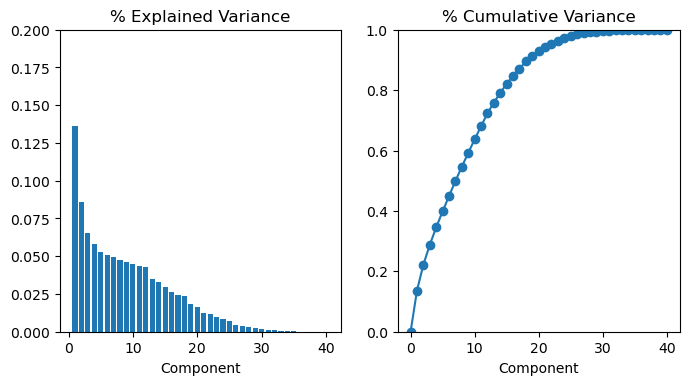

In [9]:
# Explained variance by component
# First 10 components explained 60% of variance of soil types, first 20 components explained over 80%
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 0.2)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

plot_variance(pca)